Project Task 3 - Time Series Analysis and Forecasting/Classification

1) Exploit the temporal information of the dataset preparing it for a univariate framework of analysis, i.e. select a feature and use it as your time series. You are welcome in using more than one reliable temporal split to have more time series of the same feature. You are welcome in creating more than a dataset using more than a feature and report the result on the feature you prefer or more than one. Analyze such datasets for finding motifs and/or anomalies and shaplets. Visualize and discuss them and their relationship with the class of the time series.

2) On the dataset(s) created, compute clustering based on Euclidean/Manhattan and DTW distances and compare the results. To perform the clustering you can choose among different similarity methods, i.e., shape-based, feature-based, approximation-based, compression-based, etc.. Finally, analyze the clusters and the clustering and highlight similarities and differences.

3) Apply forecasting methods on the dataset(s) created. Make sure to preprocess adequately the time series according to the method used (e.g., an exponential smoothing or an autoregression), indeed checking stationarity and reducing trends and seasonality or with the help of a statistically significant test;

4) Solve the classification task on the univariate dataset created using different approaches, i.e., traditional classification, shapelet-based, feature-based, etc.

5) Solve the classification task considering the whole dataset as a multivariate dataset. Develop the classification process you prefer (e.g. exploiting shapelets, traditional classifiers, CNN, or RNN) to maximize accuracy and F1-score.

In [75]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [76]:
df = pd.read_csv("3df_uniti.csv")

In [77]:
df.sort_index(inplace = True)

In [78]:
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [79]:
df.sort_values(by="date",inplace=True)

In [80]:
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [81]:
from datetime import datetime

dates = pd.to_datetime(df['date'], infer_datetime_format=True)
df['day'] = dates.dt.day
df['hour'] = dates.dt.hour

In [82]:
df.head()

,Unnamed: 0,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour
0,0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1,2,14
1,1,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1,2,14
2,2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1,2,14
3,3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1,2,14
4,4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1,2,14


In [83]:
day1 = df[df.day==2]
day1 = day1[['date','CO2',"hour"]]

In [84]:
day1

,date,CO2,hour
0,2015-02-02 14:19:00,749.200000,14
1,2015-02-02 14:19:59,760.400000,14
2,2015-02-02 14:21:00,769.666667,14
3,2015-02-02 14:22:00,774.750000,14
4,2015-02-02 14:23:00,779.000000,14
...,...,...,...
576,2015-02-02 23:55:00,454.000000,23
577,2015-02-02 23:55:59,451.250000,23
578,2015-02-02 23:57:00,449.333333,23
579,2015-02-02 23:57:59,446.000000,23


In [85]:
day2 = df[df.day==3]
day2 = day2[['date','CO2',"hour"]]
day2.reset_index(inplace=True)

In [86]:
day2

,index,date,CO2,hour
0,581,2015-02-03 00:00:00,451.500000,0
1,582,2015-02-03 00:01:00,455.250000,0
2,583,2015-02-03 00:02:00,455.250000,0
3,584,2015-02-03 00:03:00,451.666667,0
4,585,2015-02-03 00:04:00,451.000000,0
...,...,...,...,...
1435,2016,2015-02-03 23:55:00,547.750000,23
1436,2017,2015-02-03 23:55:59,547.250000,23
1437,2018,2015-02-03 23:57:00,551.500000,23
1438,2019,2015-02-03 23:57:59,554.000000,23


In [87]:
day3 = df[df.day==4]
day3 = day3[['date','CO2',"hour"]]
day3.reset_index(inplace=True)

In [88]:
day3

,index,date,CO2,hour
0,2021,2015-02-04 00:00:00,553.666667,0
1,2022,2015-02-04 00:01:00,552.400000,0
2,2023,2015-02-04 00:02:00,554.000000,0
3,2024,2015-02-04 00:03:00,547.000000,0
4,2025,2015-02-04 00:04:00,542.333333,0
...,...,...,...,...
1008,12781,2015-02-04 23:55:00,456.000000,23
1009,12782,2015-02-04 23:55:59,454.000000,23
1010,12783,2015-02-04 23:57:00,454.000000,23
1011,12784,2015-02-04 23:57:59,458.000000,23


In [89]:
day4 = df[df.day==5]
day4 = day4[['date','CO2',"hour"]]
day4.reset_index(inplace=True)

In [90]:
day4

,index,date,CO2,hour
0,12786,2015-02-05 00:00:00,456.500000,0
1,12787,2015-02-05 00:01:00,458.500000,0
2,12788,2015-02-05 00:02:00,459.666667,0
3,12789,2015-02-05 00:03:00,464.000000,0
4,12790,2015-02-05 00:04:00,465.000000,0
...,...,...,...,...
1435,14221,2015-02-05 23:55:00,439.500000,23
1436,14222,2015-02-05 23:55:59,445.000000,23
1437,14223,2015-02-05 23:57:00,442.500000,23
1438,14224,2015-02-05 23:57:59,443.500000,23


In [91]:
day5 = df[df.day==6]
day5 = day5[['date','CO2',"hour"]]
day5.reset_index(inplace=True)

In [92]:
day5

,index,date,CO2,hour
0,14226,2015-02-06 00:00:00,438.0,0
1,14227,2015-02-06 00:01:00,439.0,0
2,14228,2015-02-06 00:02:00,441.5,0
3,14229,2015-02-06 00:03:00,444.0,0
4,14230,2015-02-06 00:04:00,446.5,0
...,...,...,...,...
1435,15661,2015-02-06 23:55:00,441.5,23
1436,15662,2015-02-06 23:55:59,435.0,23
1437,15663,2015-02-06 23:57:00,441.0,23
1438,15664,2015-02-06 23:57:59,441.0,23


In [93]:
day6 = df[df.day==7]
day6 = day6[['date','CO2',"hour"]]
day6.reset_index(inplace=True)

In [94]:
day6

,index,date,CO2,hour
0,15666,2015-02-07 00:00:00,438.000000,0
1,15667,2015-02-07 00:01:00,433.666667,0
2,15668,2015-02-07 00:02:00,434.500000,0
3,15669,2015-02-07 00:03:00,434.000000,0
4,15670,2015-02-07 00:04:00,438.500000,0
...,...,...,...,...
1435,17101,2015-02-07 23:55:00,436.666667,23
1436,17102,2015-02-07 23:55:59,432.000000,23
1437,17103,2015-02-07 23:57:00,438.000000,23
1438,17104,2015-02-07 23:57:59,440.666667,23


In [95]:
day7 = df[df.day==8]
day7 = day7[['date','CO2',"hour"]]
day7.reset_index(inplace=True)

In [96]:
day7

,index,date,CO2,hour
0,17106,2015-02-08 00:00:00,438.500000,0
1,17107,2015-02-08 00:01:00,438.666667,0
2,17108,2015-02-08 00:02:00,437.500000,0
3,17109,2015-02-08 00:03:00,437.000000,0
4,17110,2015-02-08 00:04:00,440.000000,0
...,...,...,...,...
1435,18541,2015-02-08 23:55:00,461.000000,23
1436,18542,2015-02-08 23:55:59,456.000000,23
1437,18543,2015-02-08 23:57:00,456.000000,23
1438,18544,2015-02-08 23:57:59,459.000000,23


In [97]:
day8 = df[df.day==9]
day8 = day8[['date','CO2',"hour"]]
day8.reset_index(inplace=True)

In [98]:
day8

,index,date,CO2,hour
0,18546,2015-02-09 00:00:00,459.0,0
1,18547,2015-02-09 00:01:00,459.0,0
2,18548,2015-02-09 00:02:00,458.0,0
3,18549,2015-02-09 00:03:00,457.0,0
4,18550,2015-02-09 00:04:00,458.0,0
...,...,...,...,...
1435,19981,2015-02-09 23:55:00,502.5,23
1436,19982,2015-02-09 23:55:59,501.0,23
1437,19983,2015-02-09 23:57:00,502.0,23
1438,19984,2015-02-09 23:57:59,505.0,23


In [99]:
day9 = df[df.day==10]
day9 = day9[['date','CO2',"hour"]]
day9.reset_index(inplace=True)

In [100]:
day9

,index,date,CO2,hour
0,19986,2015-02-10 00:00:00,498.500000,0
1,19987,2015-02-10 00:01:00,500.333333,0
2,19988,2015-02-10 00:02:00,500.500000,0
3,19989,2015-02-10 00:03:00,500.333333,0
4,19990,2015-02-10 00:04:00,500.500000,0
...,...,...,...,...
569,20555,2015-02-10 09:29:00,787.250000,9
570,20556,2015-02-10 09:29:59,789.500000,9
571,20557,2015-02-10 09:30:59,798.500000,9
572,20558,2015-02-10 09:32:00,820.333333,9


In [101]:
day10 = df[df.day==11]
day10 = day10[['date','CO2',"hour"]]
day10.reset_index(inplace=True)

In [102]:
day10

,index,date,CO2,hour
0,2665,2015-02-11 14:48:00,1029.666667,14
1,2666,2015-02-11 14:49:00,1000.000000,14
2,2667,2015-02-11 14:50:00,1003.750000,14
3,2668,2015-02-11 14:51:00,1009.500000,14
4,2669,2015-02-11 14:51:59,1005.666667,14
...,...,...,...,...
547,3212,2015-02-11 23:55:00,501.333333,23
548,3213,2015-02-11 23:55:59,502.500000,23
549,3214,2015-02-11 23:57:00,502.000000,23
550,3215,2015-02-11 23:57:59,504.666667,23


In [103]:
day11 = df[df.day==12]
day11 = day11[['date','CO2',"hour"]]
day11.reset_index(inplace=True)

In [104]:
day11

,index,date,CO2,hour
0,3217,2015-02-12 00:00:00,508.000000,0
1,3218,2015-02-12 00:01:00,505.500000,0
2,3219,2015-02-12 00:02:00,502.333333,0
3,3220,2015-02-12 00:03:00,500.000000,0
4,3221,2015-02-12 00:04:00,498.000000,0
...,...,...,...,...
1435,4652,2015-02-12 23:55:00,567.000000,23
1436,4653,2015-02-12 23:55:59,567.500000,23
1437,4654,2015-02-12 23:57:00,569.000000,23
1438,4655,2015-02-12 23:57:59,566.000000,23


In [105]:
day12 = df[df.day==13]
day12 = day12[['date','CO2',"hour"]]
day12.reset_index(inplace=True)

In [106]:
day12

,index,date,CO2,hour
0,4657,2015-02-13 00:00:00,568.500000,0
1,4658,2015-02-13 00:01:00,571.000000,0
2,4659,2015-02-13 00:02:00,566.500000,0
3,4660,2015-02-13 00:03:00,561.666667,0
4,4661,2015-02-13 00:04:00,566.250000,0
...,...,...,...,...
1435,6092,2015-02-13 23:55:00,509.000000,23
1436,6093,2015-02-13 23:55:59,505.000000,23
1437,6094,2015-02-13 23:57:00,504.500000,23
1438,6095,2015-02-13 23:57:59,500.500000,23


In [107]:
day13 = df[df.day==14]
day13 = day13[['date','CO2',"hour"]]
day13.reset_index(inplace=True)

In [108]:
day13

,index,date,CO2,hour
0,6097,2015-02-14 00:00:00,505.500000,0
1,6098,2015-02-14 00:01:00,507.000000,0
2,6099,2015-02-14 00:02:00,505.333333,0
3,6100,2015-02-14 00:03:00,505.500000,0
4,6101,2015-02-14 00:04:00,504.500000,0
...,...,...,...,...
1435,7532,2015-02-14 23:55:00,533.000000,23
1436,7533,2015-02-14 23:55:59,535.000000,23
1437,7534,2015-02-14 23:57:00,540.000000,23
1438,7535,2015-02-14 23:57:59,538.250000,23


In [109]:
day14 = df[df.day==15]
day14 = day14[['date','CO2',"hour"]]
day14.reset_index(inplace=True)

In [110]:
day14

,index,date,CO2,hour
0,7537,2015-02-15 00:00:00,535.500000,0
1,7538,2015-02-15 00:01:00,541.000000,0
2,7539,2015-02-15 00:02:00,539.333333,0
3,7540,2015-02-15 00:03:00,541.000000,0
4,7541,2015-02-15 00:04:00,542.000000,0
...,...,...,...,...
1435,8972,2015-02-15 23:55:00,728.000000,23
1436,8973,2015-02-15 23:55:59,730.500000,23
1437,8974,2015-02-15 23:57:00,738.000000,23
1438,8975,2015-02-15 23:57:59,739.000000,23


In [111]:
day15 = df[df.day==16]
day15 = day15[['date','CO2',"hour"]]
day15.reset_index(inplace=True)

In [112]:
day15

,index,date,CO2,hour
0,8977,2015-02-16 00:00:00,735.333333,0
1,8978,2015-02-16 00:01:00,732.000000,0
2,8979,2015-02-16 00:02:00,726.500000,0
3,8980,2015-02-16 00:03:00,734.000000,0
4,8981,2015-02-16 00:04:00,733.000000,0
...,...,...,...,...
1435,10412,2015-02-16 23:55:00,717.000000,23
1436,10413,2015-02-16 23:55:59,709.000000,23
1437,10414,2015-02-16 23:57:00,714.500000,23
1438,10415,2015-02-16 23:57:59,715.333333,23


In [113]:
day16 = df[df.day==17]
day16 = day16[['date','CO2',"hour"]]
day16.reset_index(inplace=True)

In [114]:
day16

,index,date,CO2,hour
0,10417,2015-02-17 00:00:00,714.000000,0
1,10418,2015-02-17 00:01:00,714.000000,0
2,10419,2015-02-17 00:02:00,708.500000,0
3,10420,2015-02-17 00:03:00,708.000000,0
4,10421,2015-02-17 00:04:00,710.333333,0
...,...,...,...,...
1435,11852,2015-02-17 23:55:00,1201.000000,23
1436,11853,2015-02-17 23:55:59,1196.000000,23
1437,11854,2015-02-17 23:57:00,1194.000000,23
1438,11855,2015-02-17 23:57:59,1203.000000,23


In [115]:
day17 = df[df.day==18]
day17 = day17[['date','CO2',"hour"]]
day17.reset_index(inplace=True)

In [116]:
day17

,index,date,CO2,hour
0,11857,2015-02-18 00:00:00,1201.500000,0
1,11858,2015-02-18 00:01:00,1201.500000,0
2,11859,2015-02-18 00:02:00,1205.000000,0
3,11860,2015-02-18 00:03:00,1212.666667,0
4,11861,2015-02-18 00:04:00,1213.500000,0
...,...,...,...,...
555,12412,2015-02-18 09:15:00,1505.250000,9
556,12413,2015-02-18 09:16:00,1514.500000,9
557,12414,2015-02-18 09:16:59,1521.500000,9
558,12415,2015-02-18 09:17:59,1632.000000,9


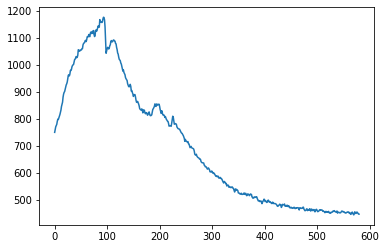

In [117]:
ts1 = day1.CO2
plt.plot(ts1)
plt.show()

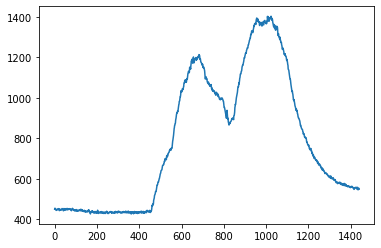

In [118]:
ts2 = day2.CO2
plt.plot(ts2)
plt.show()

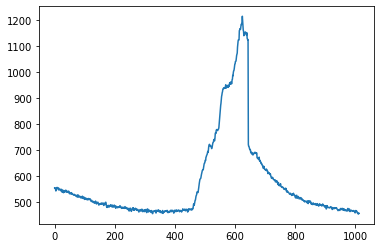

In [119]:
ts3 = day3.CO2
plt.plot(ts3)
plt.show()

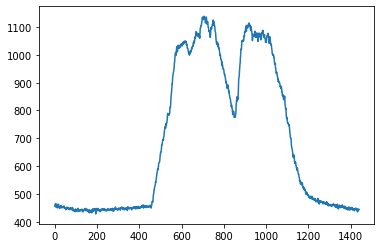

In [121]:
ts4 = day4.CO2
plt.plot(ts4)
plt.show()

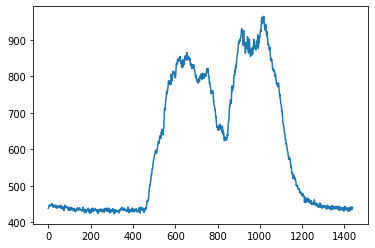

In [122]:
ts5 = day5.CO2
plt.plot(ts5)
plt.show()

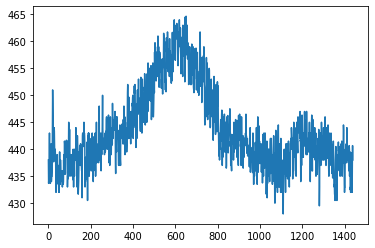

In [123]:
ts6 = day6.CO2
plt.plot(ts6)
plt.show()

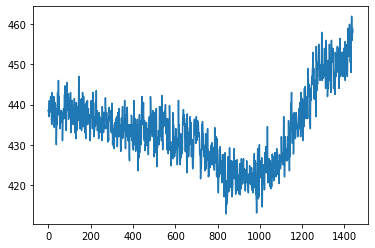

In [124]:
ts7 = day7.CO2
plt.plot(ts7)
plt.show()

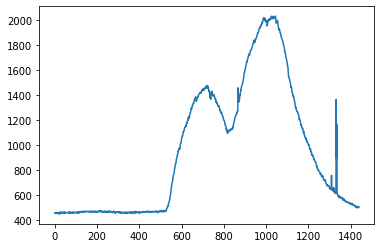

In [126]:
ts8 = day8.CO2
plt.plot(ts8)
plt.show()

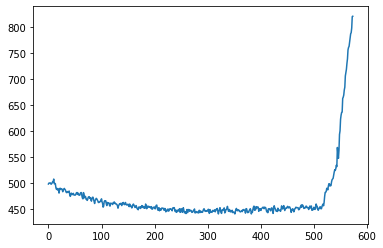

In [127]:
ts9 = day9.CO2
plt.plot(ts9)
plt.show()

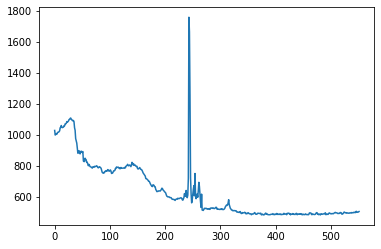

In [128]:
ts10 = day10.CO2
plt.plot(ts10)
plt.show()

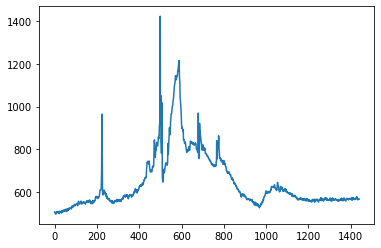

In [129]:
ts11 = day11.CO2
plt.plot(ts11)
plt.show()

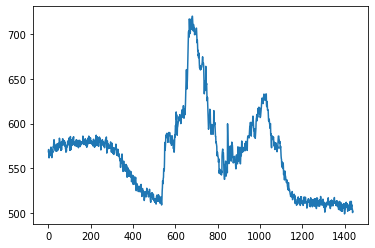

In [130]:
ts12 = day12.CO2
plt.plot(ts12)
plt.show()

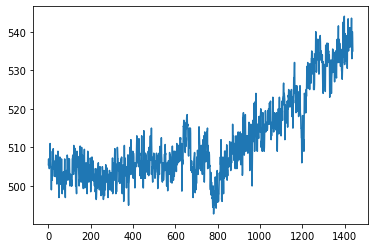

In [131]:
ts13 = day13.CO2
plt.plot(ts13)
plt.show()

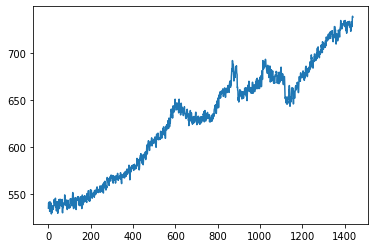

In [132]:
ts14 = day14.CO2
plt.plot(ts14)
plt.show()

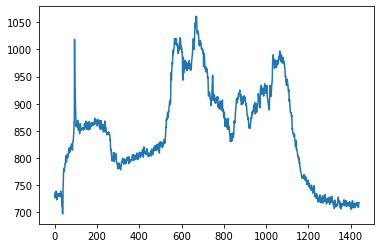

In [133]:
ts15 = day15.CO2
plt.plot(ts15)
plt.show()

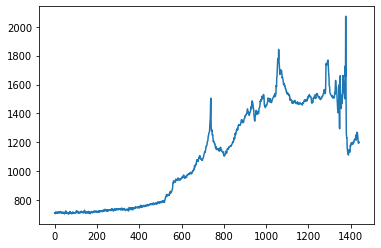

In [134]:
ts16 = day16.CO2
plt.plot(ts16)
plt.show()

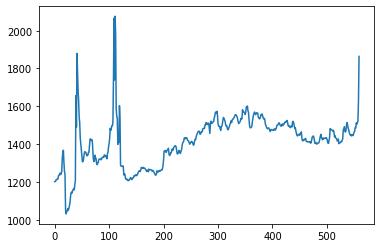

In [135]:
ts17 = day17.CO2
plt.plot(ts17)
plt.show()